In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('hollow_afm_deconvolution')

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch

import hollow_afm_deconvolution as afm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

/home/aaron/Pseudos/classes/.conda/envs/classes/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


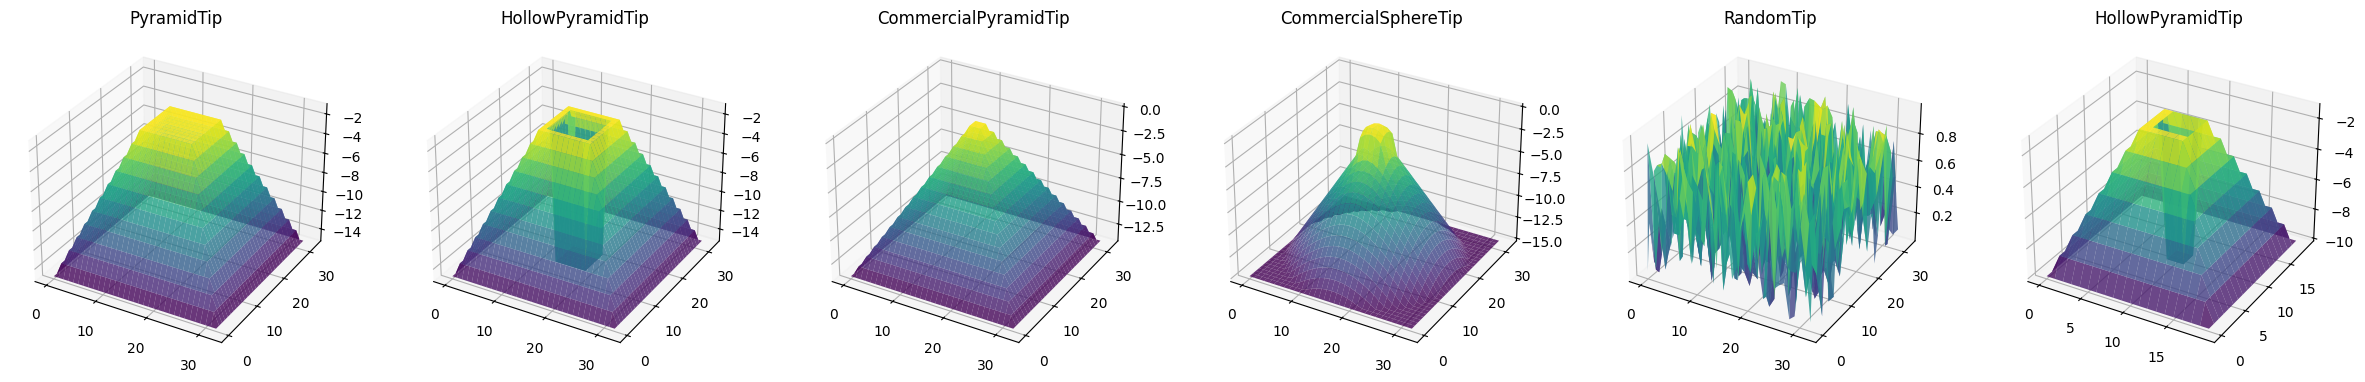

In [2]:
afm.tip.main(subplots=False)

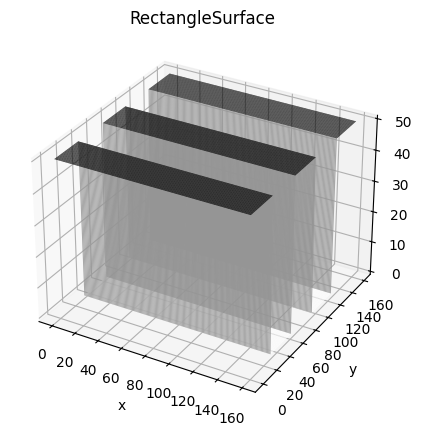

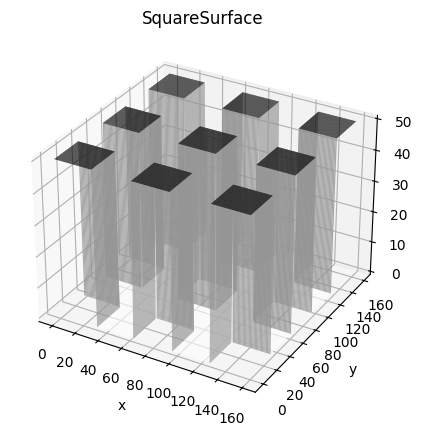

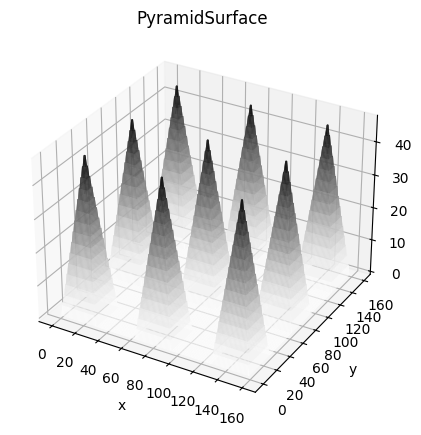

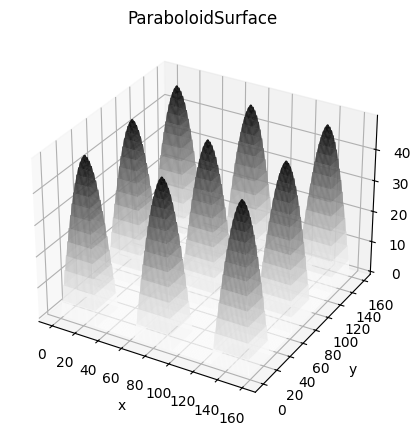

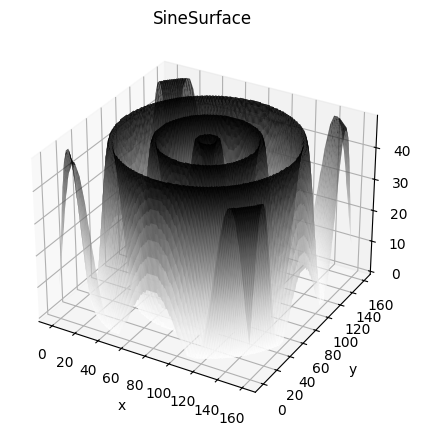

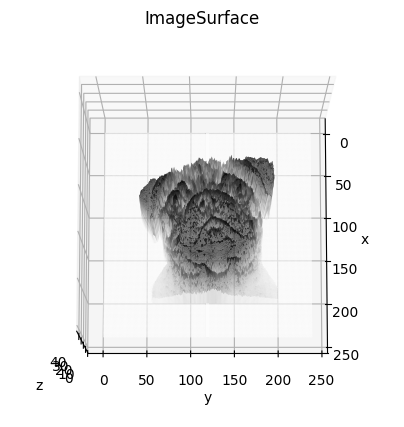

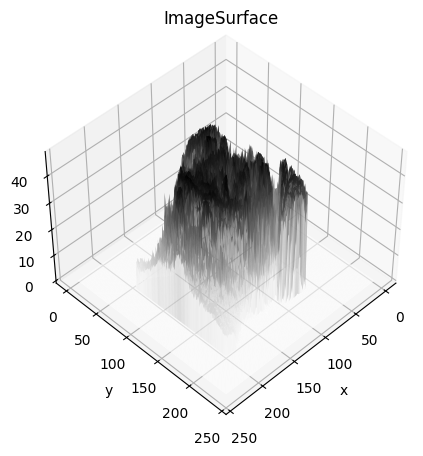

In [23]:
afm.surface.main(subplots=False)

MSE: 1.2296279668807983
MSE: 0.2367505580186844


Text(0.05, 0.95, 'MSE: 0.24')

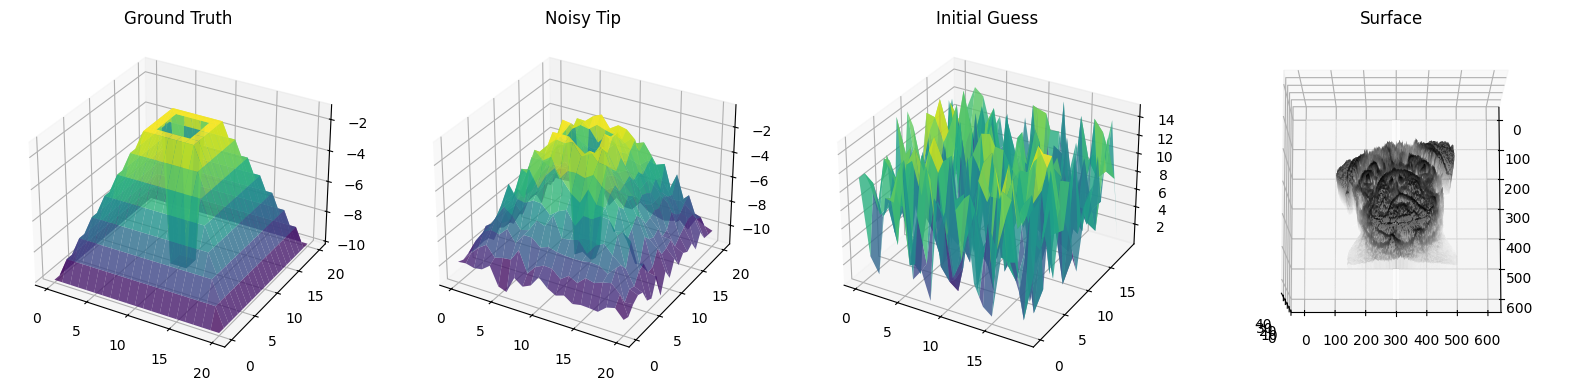

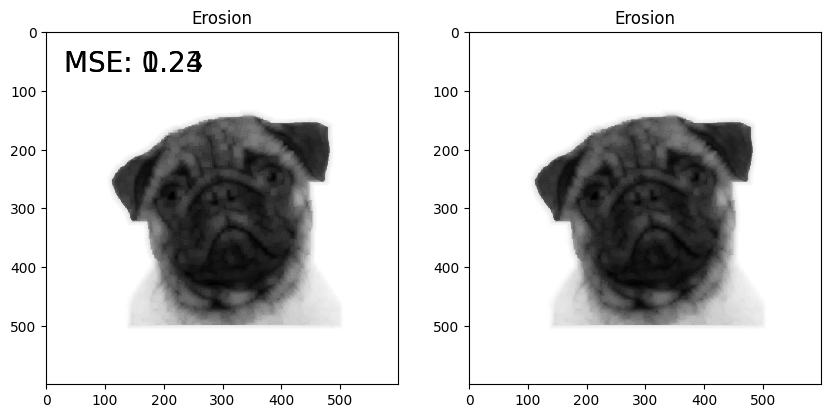

In [6]:
tip = afm.tip.create_tip("HollowPyramidTip", 21, 10, 5)
noisy_tip = tip.with_noise(0.5)
noisy_tip_2 = tip.with_noise(0.5)

random_tip = afm.tip.create_tip("RandomTip", 20)

surface = afm.surface.create_surface("ImageSurface", surface_size=400)

figsize = 5
fig = plt.figure(figsize=(figsize * 4, figsize))

ax1 = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142, projection='3d')
ax3 = fig.add_subplot(143, projection='3d')
ax4 = fig.add_subplot(144, projection='3d')

tip.plot(ax=ax1, title="Ground Truth")
noisy_tip.plot(ax=ax2, title="Noisy Tip")
random_tip.plot(ax=ax3, title="Initial Guess")
surface.plot(ax=ax4, title="Surface")

dilated_surface_noisy = afm.utils.dilation(surface, noisy_tip)
dilated_surface_random = afm.utils.dilation(surface, random_tip)
dilated_surface_known = afm.utils.dilation(surface, tip)

mse_unknown_tip = torch.nn.functional.mse_loss(afm.utils.erosion(dilated_surface_noisy, noisy_tip_2).data, afm.utils.erosion(dilated_surface_noisy, tip).data)
print(f"MSE: {mse_unknown_tip}")
mse_known_tip = torch.nn.functional.mse_loss(afm.utils.erosion(dilated_surface_noisy, noisy_tip_2).data, afm.utils.erosion(dilated_surface_noisy, noisy_tip).data)
print(f"MSE: {mse_known_tip}")

figsize = 5
fig = plt.figure(figsize=(figsize * 2, figsize))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
text_kwargs = dict(horizontalalignment='left', verticalalignment='top', fontsize=20)

afm.utils.erosion(dilated_surface_noisy, tip).plot(ax=ax1, title="Erosion", colorbar=False)
ax1.text(0.05, 0.95, f"MSE: {mse_unknown_tip:.2f}", transform=ax1.transAxes, **text_kwargs)
afm.utils.erosion(dilated_surface_noisy, noisy_tip).plot(ax=ax2, title="Erosion", colorbar=False)
ax2.text(0.05, 0.95, f"MSE: {mse_known_tip:.2f}", transform=ax2.transAxes, **text_kwargs)

Ignoring view_init for 2d plot and/or tip is not None
Ignoring view_init for 2d plot and/or tip is not None


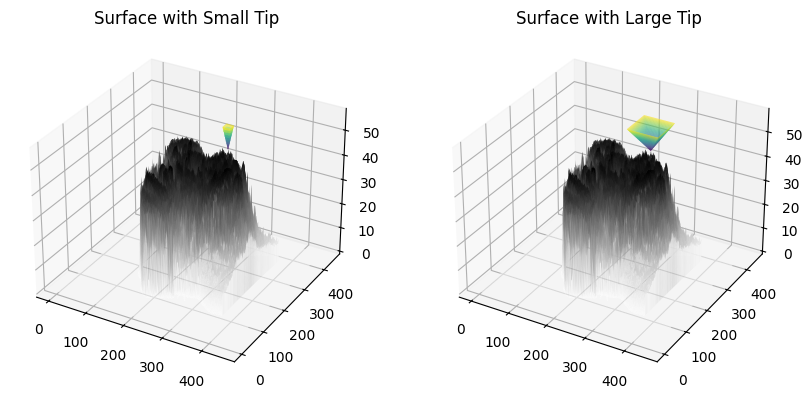

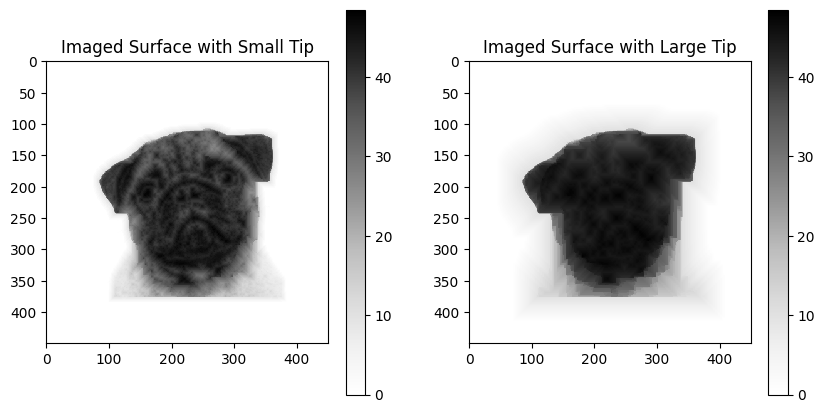

In [5]:
tip_size, tip_height, tip_size_top = 20, 10, 5
small_tip = afm.tip.create_tip("CommercialPyramidTip", tip_size, tip_height)
large_tip = afm.tip.create_tip("CommercialPyramidTip", tip_size * 4, tip_height)
image_surface = afm.surface.create_surface("ImageSurface", surface_size=300)

figsize = 5
fig = plt.figure(figsize=(figsize * 2, figsize))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

image_surface.plot(ax1, tip=small_tip, title="Surface with Small Tip")
image_surface.plot(ax2, tip=large_tip, title="Surface with Large Tip")

# "Image" the surface by using dilation and erosion
small_tip_imaged_surface = afm.utils.dilation_and_erosion(image_surface, small_tip)
large_tip_imaged_surface = afm.utils.dilation_and_erosion(image_surface, large_tip)

fig = plt.figure(figsize=(figsize * 2, figsize))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

small_tip_imaged_surface.plot(ax1, title="Imaged Surface with Small Tip")
large_tip_imaged_surface.plot(ax2, title="Imaged Surface with Large Tip")

plt.show()

tensor(29.5977)
tensor(27.2295)


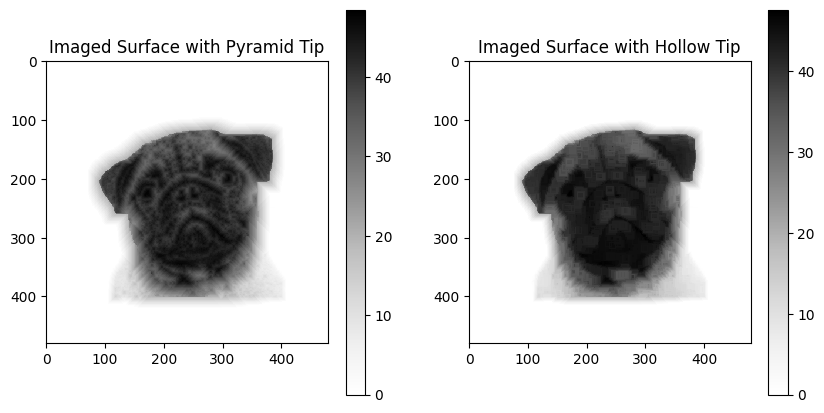

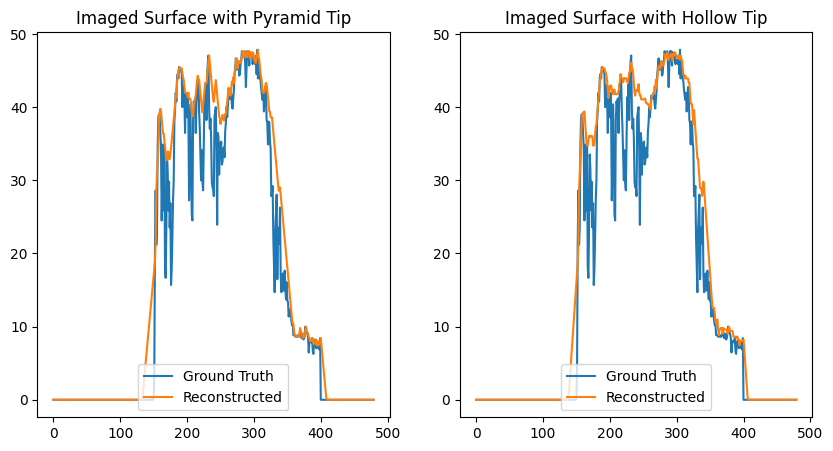

<Figure size 1000x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [33]:
text_kwargs = dict(horizontalalignment='left', verticalalignment='top', fontsize=20)
def mse(surface, tip):
    reconstructed_surface = afm.utils.opening(surface, tip)

    return torch.nn.functional.mse_loss(surface.data, reconstructed_surface.data)

tip_size, tip_height, tip_size_top = 40, 20, 10
pyramid_tip = afm.tip.create_tip("CommercialPyramidTip", tip_size, tip_height)
hollow_tip = afm.tip.create_tip("HollowPyramidTip", tip_size, tip_height, tip_size_top)
random_tip = afm.tip.create_tip("RandomTip", tip_size)
image_surface = afm.surface.create_surface("ImageSurface", surface_size=320)

# "Image" the surface by using dilation and erosion
pyramid_tip_imaged_surface = afm.utils.dilation_and_erosion(image_surface, pyramid_tip)
hollow_tip_imaged_surface = afm.utils.dilation_and_erosion(image_surface, hollow_tip)

figsize = 5
fig = plt.figure(figsize=(figsize * 2, figsize))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

pyramid_tip_imaged_surface.plot(ax1, title="Imaged Surface with Pyramid Tip")
hollow_tip_imaged_surface.plot(ax2, title="Imaged Surface with Hollow Tip")

fig = plt.figure(figsize=(figsize * 2, figsize))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

print(mse(image_surface, pyramid_tip))
print(mse(image_surface, hollow_tip))
image_surface.plot_slice(ax1, plot_kw=dict(label="Ground Truth"))
pyramid_tip_imaged_surface.plot_slice(ax1, plot_kw=dict(label="Reconstructed"), title="Imaged Surface with Pyramid Tip")
ax1.legend(loc='lower center')
image_surface.plot_slice(ax2, plot_kw=dict(label="Ground Truth"))
hollow_tip_imaged_surface.plot_slice(ax2, plot_kw=dict(label="Reconstructed"), title="Imaged Surface with Hollow Tip")
ax2.legend(loc='lower center')

fig = plt.figure(figsize=(figsize * 2, figsize))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

pyramid_tip.plot(ax1, plot_kw=dict(cmap='viridis_r'))
ax1.view_init(elev=0, azim=90)
ax1.set_zlim(-20, 10)
ax1.grid(False)
ax1.set_axis_off()
hollow_tip.plot(ax2, plot_kw=dict(cmap='viridis_r'))
ax2.view_init(elev=0, azim=90)
ax2.set_zlim(-20, 10)
ax2.grid(False)
ax2.set_axis_off()

fig.savefig("figures/pyramid_tip.png", dpi=300, bbox_inches='tight', transparent=True)
fig.clear()

fig = plt.figure(figsize=(figsize, figsize))

ax1 = fig.add_subplot(111, projection='3d')

random_tip.plot(ax1, plot_kw=dict(cmap='viridis_r'))
ax1.view_init(elev=30, azim=90)
ax1.set_zlim(-20, 10)
ax1.grid(False)
ax1.set_axis_off()

fig.savefig("figures/random_tip.png", dpi=300, bbox_inches='tight', transparent=True)
fig.clear()

fig = plt.figure(figsize=(figsize, figsize))

ax1 = fig.add_subplot(111, projection='3d')

hollow_tip.plot(ax1, plot_kw=dict(cmap='viridis_r'))
ax1.view_init(elev=0, azim=90)
ax1.set_zlim(-20, 10)
ax1.grid(False)
ax1.set_axis_off()

fig.savefig("figures/hollow_tip.png", dpi=300, bbox_inches='tight', transparent=True)
fig.clear()

plt.show()

Ignoring view_init for 2d plot and/or tip is not None


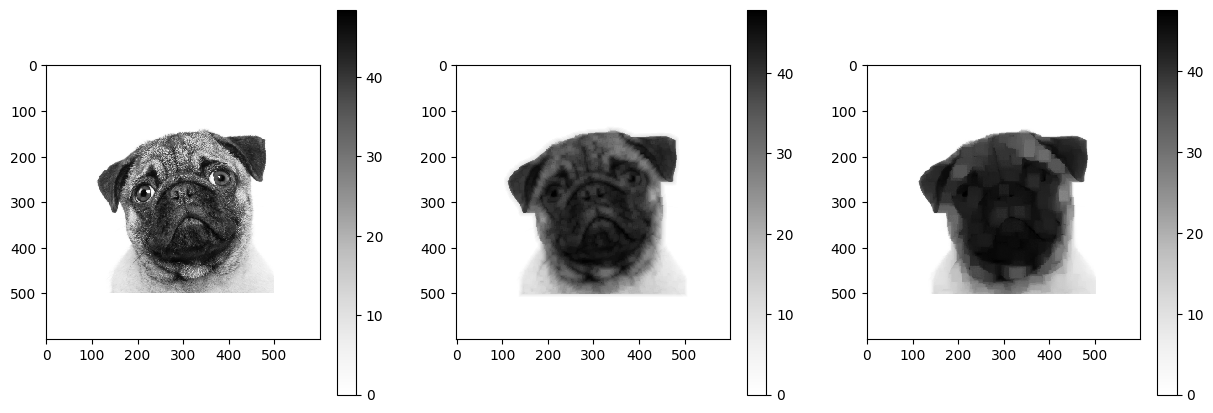

In [7]:
tip = afm.tip.create_tip("HollowPyramidTip", 20, 10, 5)
noisy_tip = tip.clone()
noisy_tip.add_noise(0.5)

surface = afm.surface.create_surface("ImageSurface", surface_size=400)
imaged_surface = afm.utils.dilation_and_erosion(surface, tip)
noisy_imaged_surface = afm.utils.dilation_and_erosion(surface, random_tip)

figsize = 5
fig = plt.figure(figsize=(figsize * 3, figsize))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

surface.plot(ax=ax1)
imaged_surface.plot(ax=ax2)
noisy_imaged_surface.plot(ax=ax3)

In [7]:
def solve(tip, surface, imaged_surface, epochs=500):
    reconstructed_tip, losses = afm.reconstruction.optimize(
        imaged_surface, surface, tip, afm.utils.opening_and_dilation, epochs=epochs, _tqdm=tqdm, device=device
    )
    reconstructed_imaged_surface = afm.utils.dilation_and_erosion(surface, reconstructed_tip)
    return reconstructed_tip, reconstructed_imaged_surface, losses

def batched_solve(tip, surfaces, surface_prior, epochs=500):
    return afm.reconstruction.batched_optimize(
        tip, surfaces, surface_prior, afm.utils.opening, epochs=epochs, _tqdm=tqdm, device=device
    )

In [10]:
num_images = 10
num_total_epochs = 500
num_epochs = num_total_epochs // num_images

tip = afm.tip.create_tip("CommercialPyramidTip", 20, 10)
noisy_tip_1 = tip.with_noise(0.5)
noisy_tip_2 = tip.with_noise(0.5)

surface = afm.surface.create_surface("ImageSurface", surface_size=240)
surface_image = afm.utils.dilation_and_erosion(surface, tip)
noisy_surface_image_1 = afm.utils.dilation_and_erosion(surface, noisy_tip_1)
noisy_surface_image_2 = afm.utils.dilation_and_erosion(surface, noisy_tip_2)

tips = [tip.clone()]
surfaces = []
for i in range(num_images):
    print(f"Image {i}")
    # start with tip you designed (without noise)
    tip, reconstructed_image, losses = solve(tip, surface, noisy_surface_image_1, epochs=num_epochs)

    tips.append(tip.clone())
    surfaces.append(reconstructed_image.clone())

Image 0


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, Loss: 30.2597
Epoch: 5, Loss: 27.0511
Epoch: 10, Loss: 24.5695
Epoch: 15, Loss: 22.7787
Epoch: 20, Loss: 21.5363
Epoch: 25, Loss: 20.5036
Epoch: 30, Loss: 19.5909
Epoch: 35, Loss: 18.8075
Epoch: 40, Loss: 18.0745
Epoch: 45, Loss: 17.3887
Image 1


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, Loss: 16.7413
Epoch: 5, Loss: 15.8762
Epoch: 10, Loss: 15.0738
Epoch: 15, Loss: 14.3497
Epoch: 20, Loss: 13.7037
Epoch: 25, Loss: 13.1095
Epoch: 30, Loss: 12.5635
Epoch: 35, Loss: 12.0562
Epoch: 40, Loss: 11.5691
Epoch: 45, Loss: 11.1051
Image 2


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, Loss: 10.6841
Epoch: 5, Loss: 10.2622
Epoch: 10, Loss: 9.8447
Epoch: 15, Loss: 9.5056
Epoch: 20, Loss: 9.1974
Epoch: 25, Loss: 8.9134
Epoch: 30, Loss: 8.6702
Epoch: 35, Loss: 8.4458
Epoch: 40, Loss: 8.2359
Epoch: 45, Loss: 8.0540
Image 3


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, Loss: 7.8926
Epoch: 5, Loss: 7.7239
Epoch: 10, Loss: 7.5370
Epoch: 15, Loss: 7.3895
Epoch: 20, Loss: 7.2606
Epoch: 25, Loss: 7.1452
Epoch: 30, Loss: 7.0327
Epoch: 35, Loss: 6.9319
Epoch: 40, Loss: 6.8273
Epoch: 45, Loss: 6.7253
Image 4


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, Loss: 6.6390
Epoch: 5, Loss: 6.5404
Epoch: 10, Loss: 6.4360
Epoch: 15, Loss: 6.3435
Epoch: 20, Loss: 6.2568
Epoch: 25, Loss: 6.1763
Epoch: 30, Loss: 6.1023
Epoch: 35, Loss: 6.0193
Epoch: 40, Loss: 5.9426
Epoch: 45, Loss: 5.8678
Image 5


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, Loss: 5.7990
Epoch: 5, Loss: 5.7434
Epoch: 10, Loss: 5.6713
Epoch: 15, Loss: 5.5993
Epoch: 20, Loss: 5.5279
Epoch: 25, Loss: 5.4629
Epoch: 30, Loss: 5.3998
Epoch: 35, Loss: 5.3192
Epoch: 40, Loss: 5.2139
Epoch: 45, Loss: 5.1047
Image 6


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, Loss: 5.0172
Epoch: 5, Loss: 4.9432
Epoch: 10, Loss: 4.8680
Epoch: 15, Loss: 4.7934
Epoch: 20, Loss: 4.7297
Epoch: 25, Loss: 4.6672
Epoch: 30, Loss: 4.6072
Epoch: 35, Loss: 4.5540
Epoch: 40, Loss: 4.5124
Epoch: 45, Loss: 4.4762
Image 7


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, Loss: 4.4392
Epoch: 5, Loss: 4.4359
Epoch: 10, Loss: 4.3900
Epoch: 15, Loss: 4.3666
Epoch: 20, Loss: 4.3396
Epoch: 25, Loss: 4.3129
Epoch: 30, Loss: 4.2930
Epoch: 35, Loss: 4.2759
Epoch: 40, Loss: 4.2620
Epoch: 45, Loss: 4.2461
Image 8


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, Loss: 4.2333
Epoch: 5, Loss: 4.2386
Epoch: 10, Loss: 4.2193
Epoch: 15, Loss: 4.2044
Epoch: 20, Loss: 4.1919
Epoch: 25, Loss: 4.1809
Epoch: 30, Loss: 4.1700
Epoch: 35, Loss: 4.1592
Epoch: 40, Loss: 4.1467
Epoch: 45, Loss: 4.1354
Image 9


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0, Loss: 4.1254
Epoch: 5, Loss: 4.1366
Epoch: 10, Loss: 4.1274
Epoch: 15, Loss: 4.1107
Epoch: 20, Loss: 4.1054
Epoch: 25, Loss: 4.0932
Epoch: 30, Loss: 4.0845
Epoch: 35, Loss: 4.0788
Epoch: 40, Loss: 4.0713
Epoch: 45, Loss: 4.0645


tensor(2.0485)
tensor(4.3910)
tensor(5.5608)
tensor(5.4767)
tensor(5.2492)
tensor(5.4376)
tensor(5.5303)
tensor(5.6035)
tensor(5.6421)
tensor(5.5945)


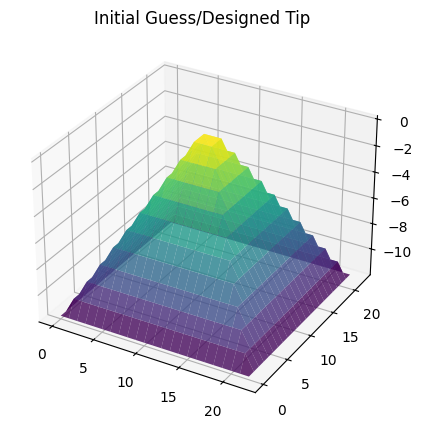

In [30]:
for surface in surfaces:
    mse = torch.nn.functional.mse_loss(noisy_surface_image_1.data, surface.data)
    print(mse)

tip = afm.tip.create_tip("CommercialPyramidTip", 23, 14)
fig = plt.figure(figsize=(figsize, figsize))
ax = fig.add_subplot(111, projection='3d')
# ax.set_xticks([0, 5, 10, 15, 20])
# ax.set_yticks([0, 5, 10, 15, 20])
# ax.set_zticks([-12, -10, -8, -6, -4, -2, 0])
# ax.set_xlim([-2, 22])
# ax.set_ylim([-2, 22])
# ax.set_zlim([-12, 0])
tip.plot(ax=ax, plot_kw=dict(cmap='viridis'), title="Initial Guess/Designed Tip")
# for tip in tips:
#     fig = plt.figure(figsize=(figsize, figsize))
#     ax = fig.add_subplot(111, projection='3d')
#     tip.plot(ax=ax, plot_kw=dict(cmap='viridis_r'))
    

In [6]:
tip_size, tip_height, tip_size_top = 23, 12, 6
pyramid_tip = afm.tip.create_tip("CommercialPyramidTip", tip_size, tip_height)
noisy_pyramid_tip = pyramid_tip.with_noise(0.5)
hollow_tip = afm.tip.create_tip("HollowPyramidTip", tip_size, tip_height, tip_size_top)
noisy_hollow_tip = hollow_tip.with_noise(0.5)
random_tip = afm.tip.create_tip("RandomTip", tip_size)

surface = afm.surface.create_surface("ImageSurface", surface_size=240)
pyramid_tip_imaged_surface = afm.utils.dilation(surface, pyramid_tip)
hollow_tip_imaged_surface = afm.utils.dilation(surface, hollow_tip)
random_tip_imaged_surface = afm.utils.dilation(surface, random_tip)

In [13]:
reconstructed_pyramid_tip, reconstructed_pyramid_imaged_surface, pyramid_losses = solve(
    noisy_pyramid_tip, surface, pyramid_tip_imaged_surface
)
reconstructed_pyramid_tip_with_random, reconstructed_pyramid_imaged_surface_with_random, pyramid_losses_with_random = solve(
    random_tip, surface, pyramid_tip_imaged_surface
)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.4473
Epoch: 50, Loss: 0.0047
Epoch: 100, Loss: 0.0006
Epoch: 150, Loss: 0.0002
Epoch: 200, Loss: 0.0008
Epoch: 250, Loss: 0.0002
Epoch: 300, Loss: 0.0006
Epoch: 350, Loss: 0.0013
Epoch: 400, Loss: 0.0013
Epoch: 450, Loss: 0.0021


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 17.6438
Epoch: 50, Loss: 4.8387
Epoch: 100, Loss: 2.1081
Epoch: 150, Loss: 1.1704
Epoch: 200, Loss: 0.7281
Epoch: 250, Loss: 0.4895
Epoch: 300, Loss: 0.3617
Epoch: 350, Loss: 0.2899
Epoch: 400, Loss: 0.2399
Epoch: 450, Loss: 0.2063


In [14]:
reconstructed_hollow_tip, reconstructed_hollow_imaged_surface, hollow_losses = solve(
    noisy_hollow_tip, surface, hollow_tip_imaged_surface
)
reconstructed_hollow_tip_with_random, reconstructed_hollow_imaged_surface_with_random, hollow_losses_with_random = solve(
    random_tip, surface, hollow_tip_imaged_surface
)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 1.1590
Epoch: 50, Loss: 0.1280
Epoch: 100, Loss: 0.0208
Epoch: 150, Loss: 0.0050
Epoch: 200, Loss: 0.0010
Epoch: 250, Loss: 0.0016
Epoch: 300, Loss: 0.0019
Epoch: 350, Loss: 0.0068
Epoch: 400, Loss: 0.0022
Epoch: 450, Loss: 0.0011


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 20.5736
Epoch: 50, Loss: 7.3250
Epoch: 100, Loss: 2.9111
Epoch: 150, Loss: 1.8642
Epoch: 200, Loss: 1.2904
Epoch: 250, Loss: 1.0085
Epoch: 300, Loss: 0.7925
Epoch: 350, Loss: 0.6744
Epoch: 400, Loss: 0.5735
Epoch: 450, Loss: 0.5017


tensor(0.)


Text(0.05, 0.95, 'MSE: 19.87')

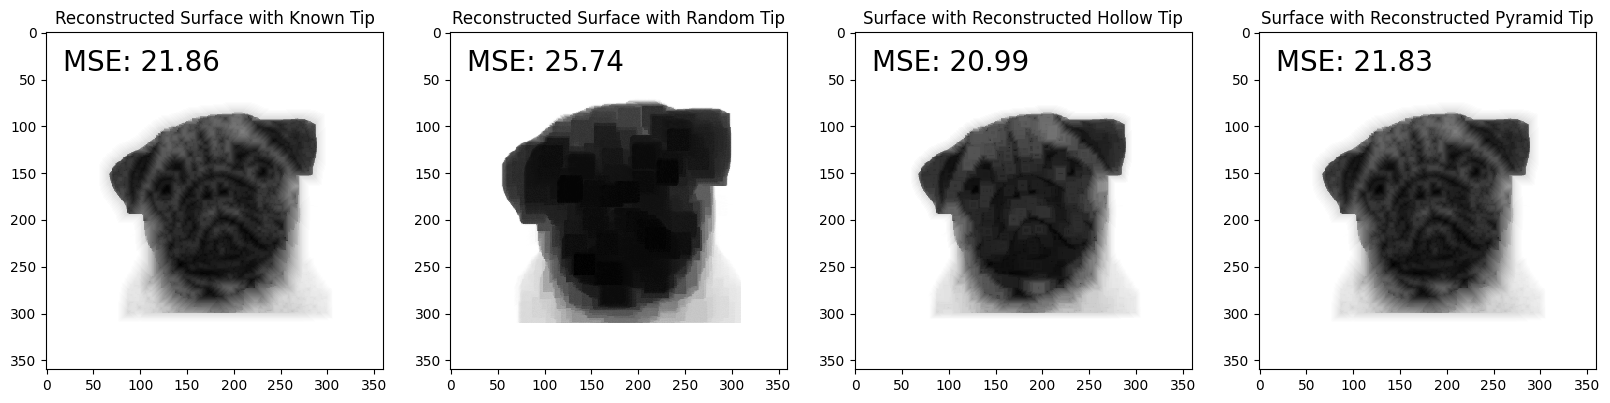

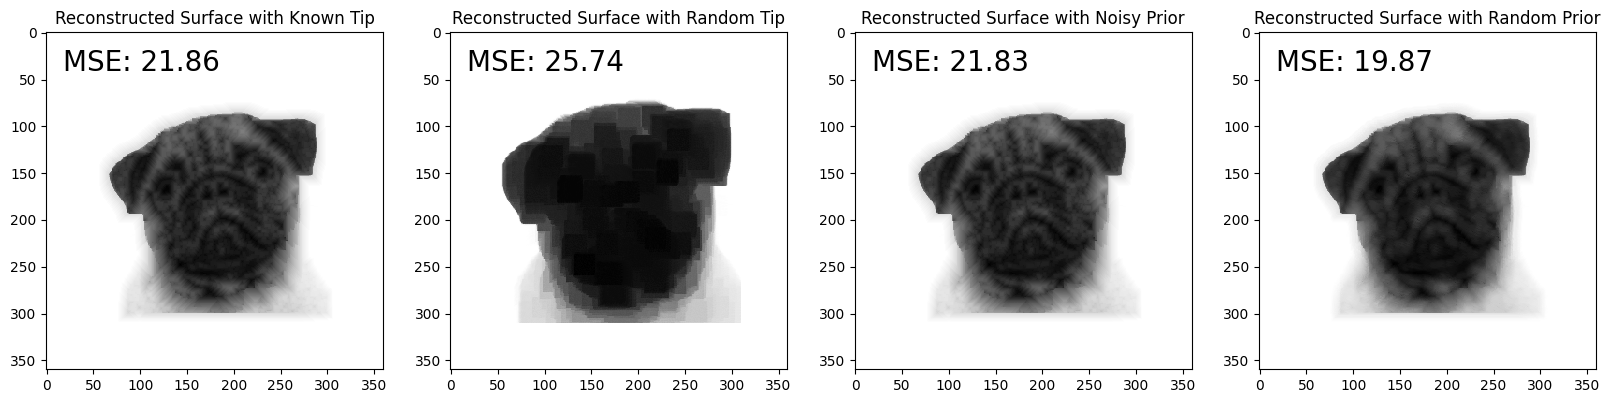

In [16]:
text_kwargs = dict(horizontalalignment='left', verticalalignment='top', fontsize=20)
def mse(surface, tip):
    reconstructed_surface = afm.utils.opening(surface, tip)

    return torch.nn.functional.mse_loss(surface.data, reconstructed_surface.data)

# def mse(tip):
#     reconstructed_surface = afm.utils.opening(surface, tip)

#     return afm.reconstruction.loss_fn(surface, reconstructed_surface, tip, afm.utils.opening)

figsize = 5
fig = plt.figure(figsize=(figsize * 4, figsize))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

afm.utils.opening(surface, pyramid_tip).plot(ax=ax1, title="Reconstructed Surface with Known Tip", colorbar=False)
random_tip_imaged_surface.plot(ax=ax2, title="Reconstructed Surface with Random Tip", colorbar=False)
reconstructed_hollow_imaged_surface.plot(ax=ax3, title="Surface with Reconstructed Hollow Tip", colorbar=False)
reconstructed_pyramid_imaged_surface.plot(ax=ax4, title="Surface with Reconstructed Pyramid Tip", colorbar=False)

ax1.text(0.05, 0.95, f"MSE: {mse(surface, pyramid_tip):.2f}", transform=ax1.transAxes, **text_kwargs)
ax2.text(0.05, 0.95, f"MSE: {mse(surface, random_tip):.2f}", transform=ax2.transAxes, **text_kwargs)
ax3.text(0.05, 0.95, f"MSE: {mse(surface, reconstructed_hollow_tip):.2f}", transform=ax3.transAxes, **text_kwargs)
ax4.text(0.05, 0.95, f"MSE: {mse(surface, reconstructed_pyramid_tip):.2f}", transform=ax4.transAxes, **text_kwargs)

fig = plt.figure(figsize=(figsize * 4, figsize))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

afm.utils.opening(surface, pyramid_tip).plot(ax=ax1, title="Reconstructed Surface with Known Tip", colorbar=False)
random_tip_imaged_surface.plot(ax=ax2, title="Reconstructed Surface with Random Tip", colorbar=False)
reconstructed_pyramid_imaged_surface.plot(ax=ax3, title="Reconstructed Surface with Noisy Prior", colorbar=False)
reconstructed_pyramid_imaged_surface_with_random.plot(ax=ax4, title="Reconstructed Surface with Random Prior", colorbar=False)

ax1.text(0.05, 0.95, f"MSE: {mse(surface, pyramid_tip):.2f}", transform=ax1.transAxes, **text_kwargs)
ax2.text(0.05, 0.95, f"MSE: {mse(surface, random_tip):.2f}", transform=ax2.transAxes, **text_kwargs)
ax3.text(0.05, 0.95, f"MSE: {mse(surface, reconstructed_pyramid_tip):.2f}", transform=ax3.transAxes, **text_kwargs)
ax4.text(0.05, 0.95, f"MSE: {mse(surface, reconstructed_pyramid_tip_with_random):.2f}", transform=ax4.transAxes, **text_kwargs)

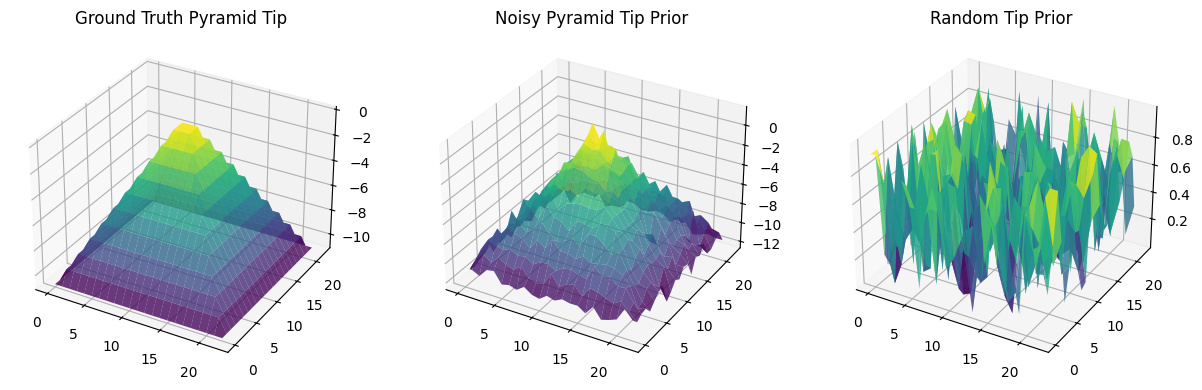

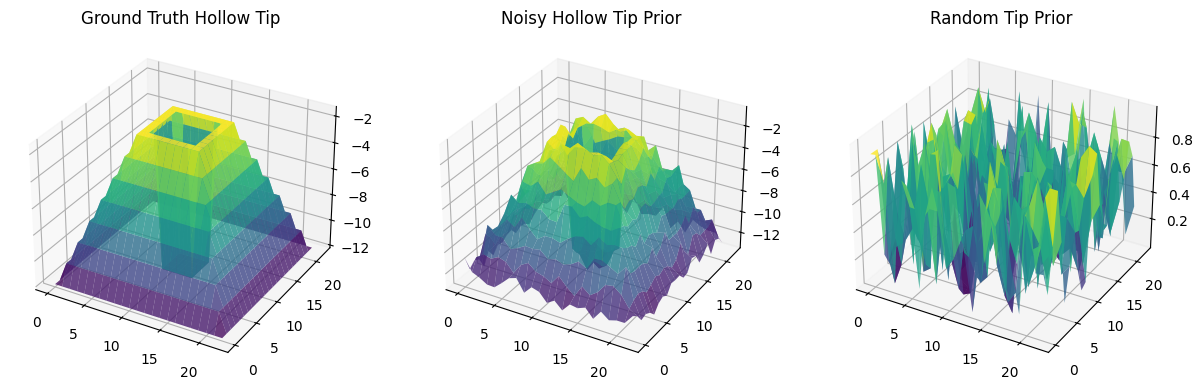

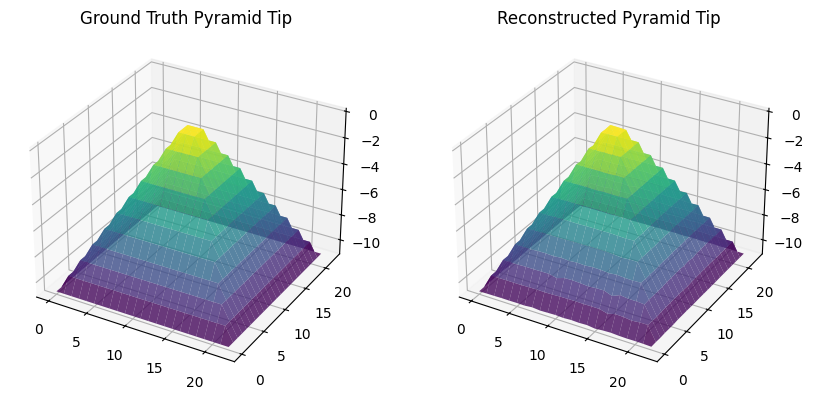

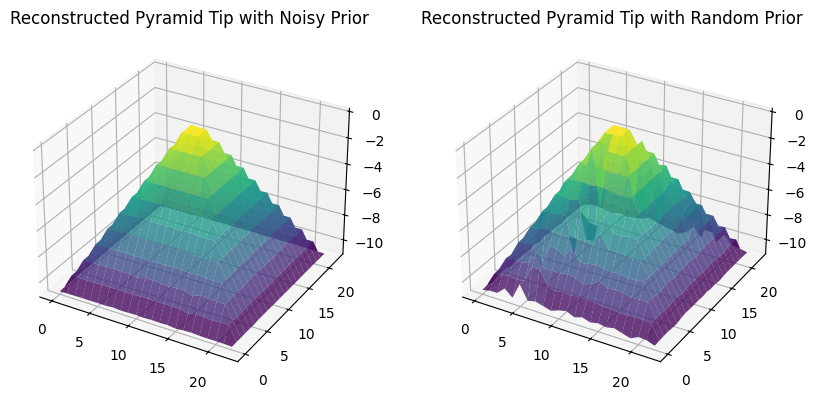

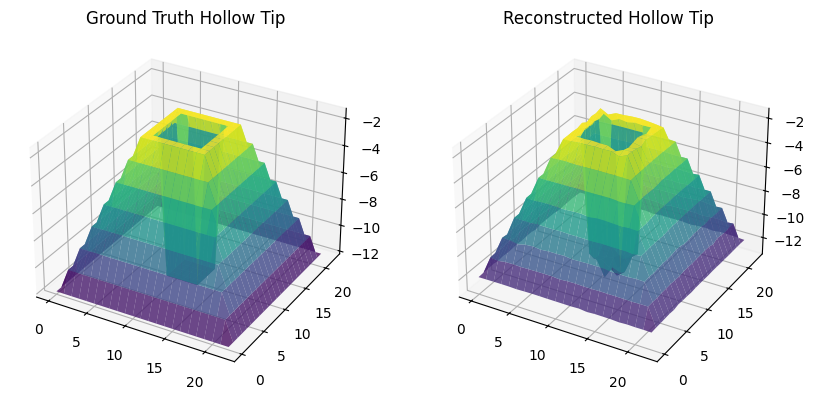

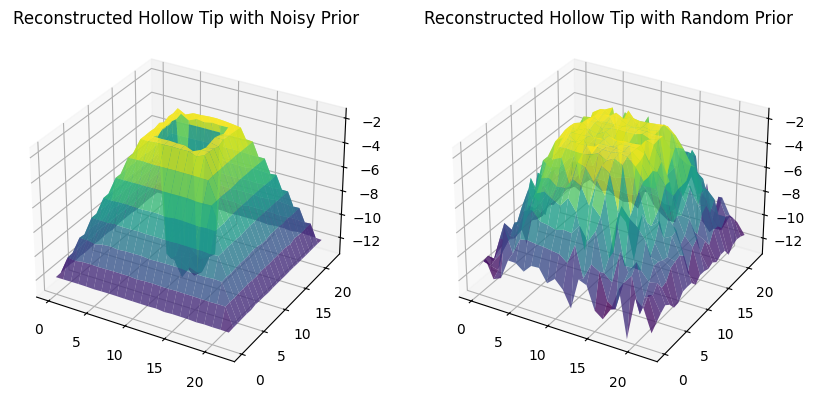

In [21]:
fig = plt.figure(figsize=(figsize * 3, figsize))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

pyramid_tip.plot(ax=ax1, title="Ground Truth Pyramid Tip")
noisy_pyramid_tip.plot(ax=ax2, title="Noisy Pyramid Tip Prior")
random_tip.plot(ax=ax3, title="Random Tip Prior")

fig = plt.figure(figsize=(figsize * 3, figsize))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

hollow_tip.plot(ax=ax1, title="Ground Truth Hollow Tip")
noisy_hollow_tip.plot(ax=ax2, title="Noisy Hollow Tip Prior")
random_tip.plot(ax=ax3, title="Random Tip Prior")

fig = plt.figure(figsize=(figsize * 2, figsize))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

pyramid_tip.plot(ax=ax1, title="Ground Truth Pyramid Tip")
reconstructed_pyramid_tip.plot(ax=ax2, title="Reconstructed Pyramid Tip")

fig = plt.figure(figsize=(figsize * 2, figsize))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

reconstructed_pyramid_tip.plot(ax=ax1, title="Reconstructed Pyramid Tip with Noisy Prior")
reconstructed_pyramid_tip_with_random.plot(ax=ax2, title="Reconstructed Pyramid Tip with Random Prior")

fig = plt.figure(figsize=(figsize * 2, figsize))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

hollow_tip.plot(ax=ax1, title="Ground Truth Hollow Tip")
reconstructed_hollow_tip.plot(ax=ax2, title="Reconstructed Hollow Tip")

fig = plt.figure(figsize=(figsize * 2, figsize))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

reconstructed_hollow_tip.plot(ax=ax1, title="Reconstructed Hollow Tip with Noisy Prior")
reconstructed_hollow_tip_with_random.plot(ax=ax2, title="Reconstructed Hollow Tip with Random Prior")

In [26]:
feature_sizes = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

tip_size, tip_height, tip_size_top = 23, 12, 6
pyramid_tip = afm.tip.create_tip("CommercialPyramidTip", tip_size, tip_height)
noisy_pyramid_tip = pyramid_tip.with_noise(0.5)

constant_surface = afm.surface.create_surface("ImageSurface", surface_size=240)

results = {}
for feature_size in feature_sizes:
    print("Starting feature size", feature_size)
    test_surface = afm.surface.create_surface("ParaboloidSurface", surface_size=240, feature_size=feature_size)
    surface = afm.surface.create_surface("PyramidSurface", surface_size=240, feature_size=feature_size)
    pyramid_tip_imaged_surface = afm.utils.dilation(surface, pyramid_tip)

    reconstructed_pyramid_tip, reconstructed_surface, pyramid_losses = solve(
        noisy_pyramid_tip, surface, pyramid_tip_imaged_surface
    )

    mse_ground_truth = afm.reconstruction.loss_fn(surface, surface, pyramid_tip, afm.utils.opening)
    mse_reconstruction = afm.reconstruction.loss_fn(surface, reconstructed_surface, reconstructed_pyramid_tip, afm.utils.opening)

    mse_test_ground_truth = afm.reconstruction.loss_fn(test_surface, test_surface, pyramid_tip, afm.utils.opening)
    mse_test = afm.reconstruction.loss_fn(test_surface, test_surface, reconstructed_pyramid_tip, afm.utils.opening)

    mse_constant_ground_truth = afm.reconstruction.loss_fn(constant_surface, constant_surface, pyramid_tip, afm.utils.opening)
    mse_constant = afm.reconstruction.loss_fn(constant_surface, constant_surface, reconstructed_pyramid_tip, afm.utils.opening)

    results[feature_size] = {}
    results[feature_size]['mse_ground_truth'] = mse_ground_truth
    results[feature_size]['mse_reconstruction'] = mse_reconstruction
    results[feature_size]['mse_test_ground_truth'] = mse_test_ground_truth
    results[feature_size]['mse_test'] = mse_test
    results[feature_size]['mse_constant_ground_truth'] = mse_constant_ground_truth
    results[feature_size]['mse_constant'] = mse_constant

    results[feature_size]['losses'] = pyramid_losses

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.6129
Epoch: 50, Loss: 0.0120
Epoch: 100, Loss: 0.0064
Epoch: 150, Loss: 0.0053
Epoch: 200, Loss: 0.0039
Epoch: 250, Loss: 0.0034
Epoch: 300, Loss: 0.0052
Epoch: 350, Loss: 0.0049
Epoch: 400, Loss: 0.0032
Epoch: 450, Loss: 0.0021


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.6597
Epoch: 50, Loss: 0.0223
Epoch: 100, Loss: 0.0085
Epoch: 150, Loss: 0.0063
Epoch: 200, Loss: 0.0053
Epoch: 250, Loss: 0.0044
Epoch: 300, Loss: 0.0031
Epoch: 350, Loss: 0.0083
Epoch: 400, Loss: 0.0071
Epoch: 450, Loss: 0.0031


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.6543
Epoch: 50, Loss: 0.0129
Epoch: 100, Loss: 0.0103
Epoch: 150, Loss: 0.0093
Epoch: 200, Loss: 0.0090
Epoch: 250, Loss: 0.0089
Epoch: 300, Loss: 0.0086
Epoch: 350, Loss: 0.0086
Epoch: 400, Loss: 0.0087
Epoch: 450, Loss: 0.0093


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.6321
Epoch: 50, Loss: 0.0091
Epoch: 100, Loss: 0.0050
Epoch: 150, Loss: 0.0051
Epoch: 200, Loss: 0.0056
Epoch: 250, Loss: 0.0050
Epoch: 300, Loss: 0.0051
Epoch: 350, Loss: 0.0047
Epoch: 400, Loss: 0.0132
Epoch: 450, Loss: 0.0050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.6387
Epoch: 50, Loss: 0.0062
Epoch: 100, Loss: 0.0033
Epoch: 150, Loss: 0.0024
Epoch: 200, Loss: 0.0022
Epoch: 250, Loss: 0.0062
Epoch: 300, Loss: 0.0024
Epoch: 350, Loss: 0.0019
Epoch: 400, Loss: 0.0019
Epoch: 450, Loss: 0.0020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.6094
Epoch: 50, Loss: 0.0037
Epoch: 100, Loss: 0.0024
Epoch: 150, Loss: 0.0022
Epoch: 200, Loss: 0.0022
Epoch: 250, Loss: 0.0022
Epoch: 300, Loss: 0.0023
Epoch: 350, Loss: 0.0077
Epoch: 400, Loss: 0.0036
Epoch: 450, Loss: 0.0034


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.7117
Epoch: 50, Loss: 0.0074
Epoch: 100, Loss: 0.0052
Epoch: 150, Loss: 0.0032
Epoch: 200, Loss: 0.0032
Epoch: 250, Loss: 0.0036
Epoch: 300, Loss: 0.0033
Epoch: 350, Loss: 0.0034
Epoch: 400, Loss: 0.0033
Epoch: 450, Loss: 0.0037


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 1.0915
Epoch: 50, Loss: 0.0047
Epoch: 100, Loss: 0.0018
Epoch: 150, Loss: 0.0013
Epoch: 200, Loss: 0.0013
Epoch: 250, Loss: 0.0013
Epoch: 300, Loss: 0.0013
Epoch: 350, Loss: 0.0013
Epoch: 400, Loss: 0.0279
Epoch: 450, Loss: 0.0032


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.7232
Epoch: 50, Loss: 0.0140
Epoch: 100, Loss: 0.0039
Epoch: 150, Loss: 0.0027
Epoch: 200, Loss: 0.0024
Epoch: 250, Loss: 0.0024
Epoch: 300, Loss: 0.0022
Epoch: 350, Loss: 0.0022
Epoch: 400, Loss: 0.0022
Epoch: 450, Loss: 0.0021


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.4154
Epoch: 50, Loss: 0.0141
Epoch: 100, Loss: 0.0080
Epoch: 150, Loss: 0.0085
Epoch: 200, Loss: 0.0084
Epoch: 250, Loss: 0.0051
Epoch: 300, Loss: 0.0050
Epoch: 350, Loss: 0.0056
Epoch: 400, Loss: 0.0047
Epoch: 450, Loss: 0.0039


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.3853
Epoch: 50, Loss: 0.0177
Epoch: 100, Loss: 0.0080
Epoch: 150, Loss: 0.0055
Epoch: 200, Loss: 0.0051
Epoch: 250, Loss: 0.0049
Epoch: 300, Loss: 0.0084
Epoch: 350, Loss: 0.0073
Epoch: 400, Loss: 0.0051
Epoch: 450, Loss: 0.0045


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.4540
Epoch: 50, Loss: 0.0167
Epoch: 100, Loss: 0.0082
Epoch: 150, Loss: 0.0077
Epoch: 200, Loss: 0.0070
Epoch: 250, Loss: 0.0077
Epoch: 300, Loss: 0.0089
Epoch: 350, Loss: 0.0076
Epoch: 400, Loss: 0.0064
Epoch: 450, Loss: 0.0061


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.4221
Epoch: 50, Loss: 0.0159
Epoch: 100, Loss: 0.0072
Epoch: 150, Loss: 0.0065
Epoch: 200, Loss: 0.0073
Epoch: 250, Loss: 0.0054
Epoch: 300, Loss: 0.0057
Epoch: 350, Loss: 0.0057
Epoch: 400, Loss: 0.0091
Epoch: 450, Loss: 0.0075


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.3988
Epoch: 50, Loss: 0.0174
Epoch: 100, Loss: 0.0063
Epoch: 150, Loss: 0.0051
Epoch: 200, Loss: 0.0129
Epoch: 250, Loss: 0.0051
Epoch: 300, Loss: 0.0045
Epoch: 350, Loss: 0.0045
Epoch: 400, Loss: 0.0046
Epoch: 450, Loss: 0.0044


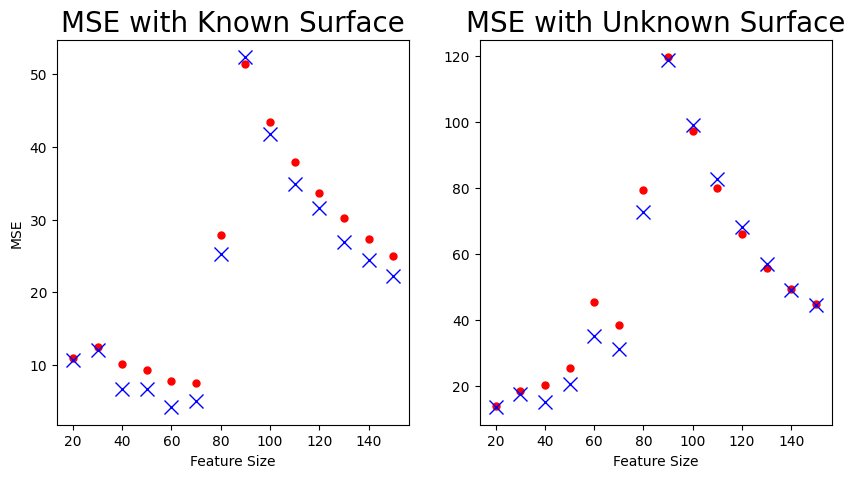

In [31]:
# import seaborn as sns
# sns.set_theme()

ground_truth_mse = torch.tensor([results[feature_size]["mse_ground_truth"] for feature_size in feature_sizes])
reconstruction_mse = torch.tensor([results[feature_size]["mse_reconstruction"] for feature_size in feature_sizes])

test_mse = torch.tensor([results[feature_size]["mse_test"] for feature_size in feature_sizes])
test_ground_truth_mse = torch.tensor([results[feature_size]["mse_test_ground_truth"] for feature_size in feature_sizes])

constant_mse = torch.tensor([results[feature_size]["mse_constant"] for feature_size in feature_sizes])
constant_ground_truth_mse = torch.tensor([results[feature_size]["mse_constant_ground_truth"] for feature_size in feature_sizes])

figsize = 5
fig = plt.figure(figsize=(figsize * 2, figsize))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# ax3 = fig.add_subplot(133)

ax1.plot(feature_sizes, ground_truth_mse.tolist(), '.r', label="Ground Truth", markersize=10)
ax1.plot(feature_sizes, reconstruction_mse.tolist(), 'xb', label="Reconstruction", markersize=10)
ax1.set_xlabel("Feature Size")
ax1.set_ylabel("MSE")
ax1.set_title("MSE with Known Surface", fontsize=20)

ax2.plot(feature_sizes, test_ground_truth_mse.tolist(), '.r', label="Ground Truth", markersize=10)
ax2.plot(feature_sizes, test_mse.tolist(), 'xb', label="Reconstruction", markersize=10)
ax2.set_xlabel("Feature Size")
ax2.set_title("MSE with Unknown Surface", fontsize=20)

# ax3.plot(feature_sizes, constant_ground_truth_mse.tolist(), '.r', label="Ground Truth")
# ax3.plot(feature_sizes, constant_mse.tolist(), 'xb', label="Reconstruction")
# ax3.set_xlabel("Feature Size")
# ax3.set_title("MSE with Test Data")

handles, labels = ax1.get_legend_handles_labels()
# fig.legend(loc='upper left', handles=handles, labels=labels)


In [72]:
# Compare the MSE with reconstructed tip and ground truth tip with some candidate surfaces

figsize = 5
fig = plt.figure(figsize=(figsize, figsize))

feature_sizes = [20, 40, 60, 80, 100]

candidate_surfaces = ["PyramidSurface", "SquareSurface", "RectangleSurface", "ParaboloidSurface"]

data = {}
for feature_size in feature_sizes:
    data[feature_size] = {}
    for candidate_surface in candidate_surfaces:
        print(f"Running: {feature_size=}, {candidate_surface=}")
        surface = afm.surface.create_surface(candidate_surface, surface_size=240, feature_size=feature_size)

        reconstructed_surface = afm.utils.opening(surface, reconstructed_pyramid_tip)

        mse_ground_truth = afm.reconstruction.loss_fn(surface, surface, pyramid_tip, afm.utils.opening)
        mse_reconstruction = afm.reconstruction.loss_fn(surface, reconstructed_surface, reconstructed_pyramid_tip, afm.utils.opening)

        # print(f"Surface: {surface.__class__.__name__}")
        # print(f"Ground Truth MSE: {mse_ground_truth}")
        # print(f"Reconstruction MSE: {mse_reconstruction}")
        # print(f"Difference: {mse_reconstruction - mse_ground_truth}")

        data[feature_size][candidate_surface] = {}
        data[feature_size][candidate_surface]["Ground Truth"] = mse_ground_truth
        data[feature_size][candidate_surface]["Reconstruction"] = mse_reconstruction
print(data)


Running: feature_size=20, candidate_surface='PyramidSurface'
Running: feature_size=20, candidate_surface='SquareSurface'
Running: feature_size=20, candidate_surface='RectangleSurface'
Running: feature_size=20, candidate_surface='ParaboloidSurface'
Running: feature_size=40, candidate_surface='PyramidSurface'
Running: feature_size=40, candidate_surface='SquareSurface'
Running: feature_size=40, candidate_surface='RectangleSurface'
Running: feature_size=40, candidate_surface='ParaboloidSurface'
Running: feature_size=60, candidate_surface='PyramidSurface'
Running: feature_size=60, candidate_surface='SquareSurface'
Running: feature_size=60, candidate_surface='RectangleSurface'
Running: feature_size=60, candidate_surface='ParaboloidSurface'
Running: feature_size=80, candidate_surface='PyramidSurface'
Running: feature_size=80, candidate_surface='SquareSurface'
Running: feature_size=80, candidate_surface='RectangleSurface'
Running: feature_size=80, candidate_surface='ParaboloidSurface'
Running:

<Figure size 500x500 with 0 Axes>

Text(0, 0.5, 'MSE')

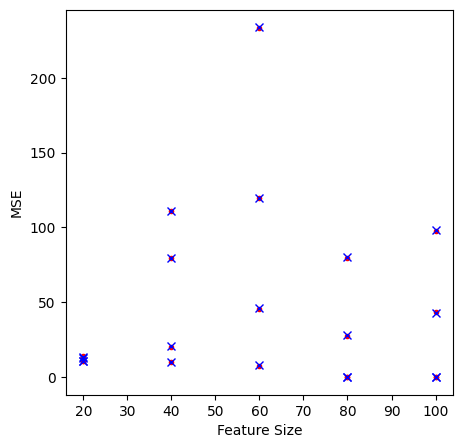

In [90]:
feature_sizes = [20, 40, 60, 80, 100]
feature_sizes_x = torch.tile(torch.tensor(feature_sizes), (len(candidate_surfaces), 1))
ground_truth_mse = torch.tensor([[data[feature_size][surface_type]["Ground Truth"] for feature_size in feature_sizes] for surface_type in candidate_surfaces])
reconstruction_mse = torch.tensor([[data[feature_size][surface_type]["Reconstruction"] for feature_size in feature_sizes] for surface_type in candidate_surfaces])

figsize = 5
fig = plt.figure(figsize=(figsize, figsize))

ax1 = fig.add_subplot(111)

ax1.plot(feature_sizes_x.tolist(), ground_truth_mse.tolist(), '.r', label="Ground Truth")
ax1.plot(feature_sizes_x.tolist(), reconstruction_mse.tolist(), 'xb', label="Reconstruction")
ax1.set_xlabel("Feature Size")
ax1.set_ylabel("MSE")

In [63]:
tip_size, tip_height, tip_size_top = 13, 7, 3
pyramid_tip = afm.tip.create_tip("CommercialPyramidTip", tip_size, tip_height)
noisy_pyramid_tip = pyramid_tip.with_noise(0.5)
random_tip = afm.tip.create_tip("RandomTip", tip_size)

surface = afm.surface.create_surface("PyramidSurface", surface_size=160)

# generate a batch of noisy surfaces
batch_size = 10
noisy_surfaces = []
for _ in range(batch_size):
    noisy_surfaces.append(surface.with_noise(0.5))

noisy_surface_prior = afm.utils.opening(surface.with_noise(1.5), noisy_pyramid_tip).clone()

In [64]:
reconstructed_pyramid_tip, reconstructed_surface, pyramid_losses = batched_solve(noisy_pyramid_tip, noisy_surfaces, noisy_surface_prior)

  0%|          | 0/1000 [00:00<?, ?it/s]

/home/aaron/Pseudos/classes/2.c67/project/hollow-afm-deconvolution/hollow_afm_deconvolution/reconstruction.py:84: UserWarning: Using a target size (torch.Size([10, 160, 160])) that is different to the input size (torch.Size([160, 160])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(surface.data, reconstructions).sum()


Epoch: 0, Loss: 1.9227
Epoch: 100, Loss: 1.1129
Epoch: 200, Loss: 1.1130
Epoch: 300, Loss: 1.1137
Epoch: 400, Loss: 1.1119
Epoch: 500, Loss: 1.1130
Epoch: 600, Loss: 1.1128
Epoch: 700, Loss: 1.1138
Epoch: 800, Loss: 1.1136
Epoch: 900, Loss: 1.1131


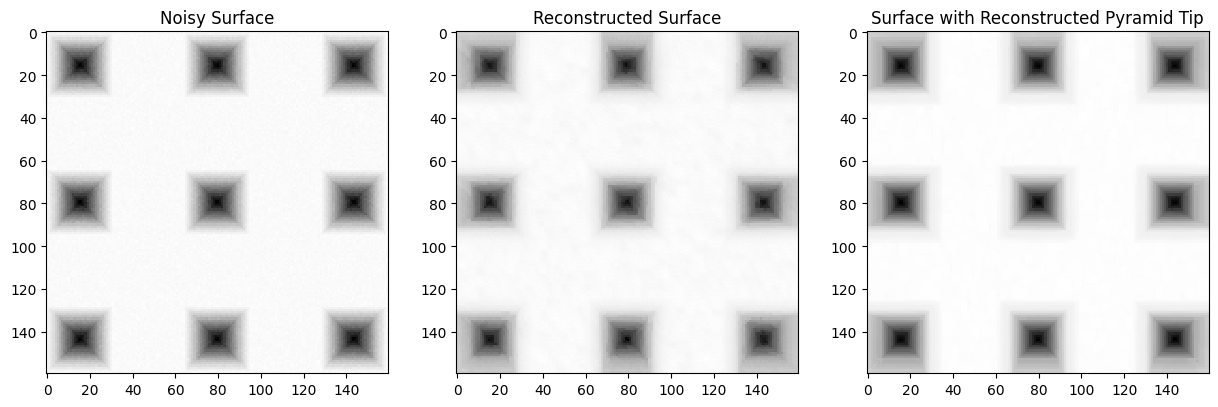

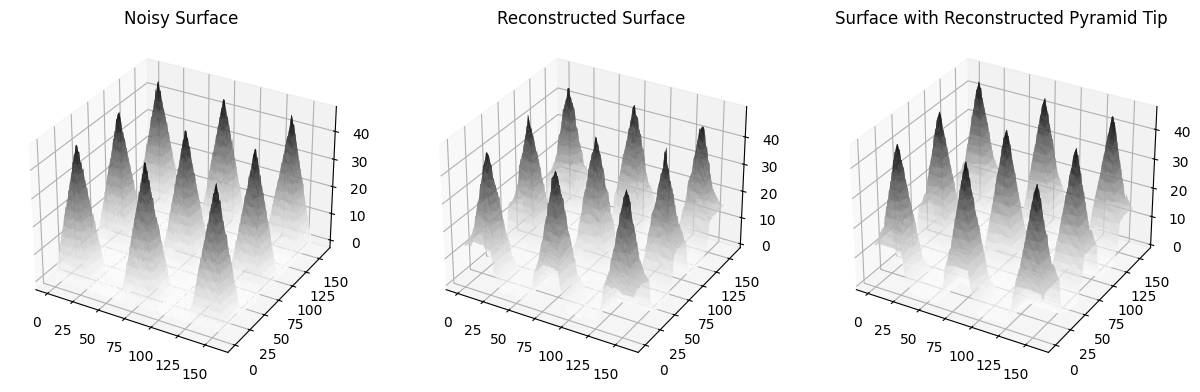

In [67]:
noisy_surface = noisy_surfaces[0]
noisy_surface.data = noisy_surface.data.cpu()
reconstructed_pyramid_imaged_surface = afm.utils.dilation_and_erosion(noisy_surface, reconstructed_pyramid_tip)

figsize = 5
fig = plt.figure(figsize=(figsize * 3, figsize))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

noisy_surface.plot(ax=ax1, title="Noisy Surface", colorbar=False)
reconstructed_surface.plot(ax=ax2, title="Reconstructed Surface", colorbar=False)
reconstructed_pyramid_imaged_surface.plot(ax=ax3, title="Surface with Reconstructed Pyramid Tip", colorbar=False)

fig = plt.figure(figsize=(figsize * 3, figsize))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

noisy_surface.plot(ax=ax1, title="Noisy Surface")
reconstructed_surface.plot(ax=ax2, title="Reconstructed Surface")
reconstructed_pyramid_imaged_surface.plot(ax=ax3, title="Surface with Reconstructed Pyramid Tip")

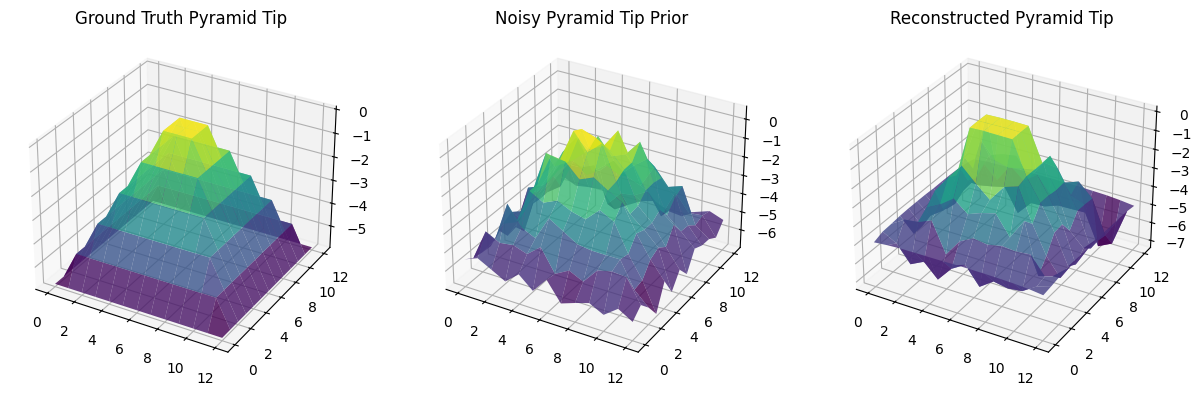

In [66]:
fig = plt.figure(figsize=(figsize * 3, figsize))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

pyramid_tip.plot(ax=ax1, title="Ground Truth Pyramid Tip")
noisy_pyramid_tip.plot(ax=ax2, title="Noisy Pyramid Tip Prior")
reconstructed_pyramid_tip.plot(ax=ax3, title="Reconstructed Pyramid Tip")
